In [1]:
import pandas as pd
import numpy as np

In [2]:
#import broccoli raw data from USDA 2016-2012
broc_2016 = pd.read_csv('/Users/anastasia.petrie/Desktop/USDA_Calc/Data/broc csv/broc_2016.csv')

In [3]:
broc_2015 = pd.read_csv('/Users/anastasia.petrie/Desktop/USDA_Calc/Data/broc csv/broc_2015.csv')
broc_2014 = pd.read_csv('/Users/anastasia.petrie/Desktop/USDA_Calc/Data/broc csv/broc_2014.csv')
broc_2013 = pd.read_csv('/Users/anastasia.petrie/Desktop/USDA_Calc/Data/broc csv/broc_2013.csv')
broc_2012 = pd.read_csv('/Users/anastasia.petrie/Desktop/USDA_Calc/Data/broc csv/broc_2012.csv')

In [4]:
#combine into single file
broc = pd.concat([broc_2016, broc_2015, broc_2014, broc_2013, broc_2012])

In [5]:
#convert to dataframe
b = pd.DataFrame(broc)

In [6]:
b.head(5)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Purchase Lot Size,Section or Sale,Import/Export,Supply Tone,Demand Tone,Basis of Sale,Market Tone,Price Comment,Comments,Rpt City
0,BROCCOLI,SALINAS-WATSONVILLE CALIFORNIA,NaN,cartons,NaN,NaN,NaN,3/2/16,4.45,7.55,...,NaN,NaN,NaN,NaN,LIGHT.,Sales F.O.B. Shipping Point and/or Delivered S...,NaN,occasional higher and lower. FIRST REPORT.,Extra services included.,"PHOENIX, AZ"
1,BROCCOLI,SALINAS-WATSONVILLE CALIFORNIA,NaN,cartons,NaN,NaN,NaN,3/3/16,5.45,7.55,...,NaN,NaN,NaN,NaN,LIGHT.,Sales F.O.B. Shipping Point and/or Delivered S...,ABOUT STEADY.,occasional lower,Extra services included.,"PHOENIX, AZ"
2,BROCCOLI,SALINAS-WATSONVILLE CALIFORNIA,NaN,cartons,NaN,NaN,NaN,3/4/16,5.00,7.55,...,NaN,NaN,NaN,NaN,FAIRLY LIGHT.,Sales F.O.B. Shipping Point and/or Delivered S...,ABOUT STEADY.,occasional higher and lower,Extra services included.,"PHOENIX, AZ"
3,BROCCOLI,SALINAS-WATSONVILLE CALIFORNIA,NaN,cartons,NaN,NaN,NaN,3/7/16,4.65,8.55,...,NaN,NaN,NaN,NaN,FAIRLY LIGHT.,Sales F.O.B. Shipping Point and/or Delivered S...,"14S ABOUT STEADY, CROWN CUT SLIGHTLY LOWER.",NaN,Extra services included. Harvest curtailed by ...,"PHOENIX, AZ"
4,BROCCOLI,SALINAS-WATSONVILLE CALIFORNIA,NaN,cartons,NaN,NaN,NaN,3/8/16,4.65,8.55,...,NaN,NaN,NaN,NaN,FAIRLY LIGHT.,Sales F.O.B. Shipping Point and/or Delivered S...,ABOUT STEADY.,NaN,Extra services included. Harvest curtailed mud...,"PHOENIX, AZ"


In [7]:
list (b.columns.values)

['Commodity Name',
 'City Name',
 'Type',
 'Package',
 'Variety',
 'Sub Variety',
 'Grade',
 'Date',
 'Low Price',
 'High Price',
 'Mostly Low',
 'Mostly High',
 'Season',
 'Item Size',
 'Color',
 'Environment',
 'Unit of Sale',
 'Quality',
 'Condition',
 'Appearance',
 'Storage',
 'Shelled/Unshelled',
 'Purchase Lot Size',
 'Section or Sale',
 'Import/Export',
 'Supply Tone',
 'Demand Tone',
 'Basis of Sale',
 'Market Tone',
 'Price Comment',
 'Comments',
 'Rpt City']

In [8]:
#clean up column names formats 
old_names = [
 'Commodity Name',
 'City Name',
 'Type',
 'Package',
 'Variety',
 'Sub Variety',
 'Grade',
 'Date',
 'Low Price',
 'High Price',
 'Mostly Low',
 'Mostly High',
 'Season',
 'Item Size',
 'Color',
 'Environment',
 'Unit of Sale',
 'Quality',
 'Condition',
 'Appearance',
 'Storage',
 'Shelled/Unshelled',
 'Purchase Lot Size',
 'Section or Sale',
 'Import/Export',
 'Supply Tone',
 'Demand Tone',
 'Basis of Sale',
 'Market Tone',
 'Price Comment',
 'Comments',
 'Rpt City'] 
new_names = [
 'commodity',
 'city',
 'type',
 'package',
 'variety',
 'sub_variety',
 'grade',
 'date',
 'low_price',
 'high_price',
 'mostly_low',
 'mostly_high',
 'season',
 'size',
 'color',
 'environment',
 'unit_of_sale',
 'quality',
 'condition',
 'appearance',
 'storage',
 'shelled',
 'purchase_lot_size',
 'section',
 'import',
 'supply_tone',
 'demand_tone',
 'basis_of_sale',
 'market_tone',
 'Price Comment',
 'comments',
 'rpt_city']
b.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [9]:
#explore the data
b.isnull().sum()

commodity               0
city                    0
type                 8172
package                 5
variety              4475
sub_variety          6733
grade                8244
date                    0
low_price             215
high_price            215
mostly_low           1690
mostly_high          1690
season                  0
size                 3775
color                8244
environment          8244
unit_of_sale         8244
quality              8244
condition            8244
appearance           8244
storage              8244
shelled              8244
purchase_lot_size    8244
section              8244
import               8244
supply_tone          6227
demand_tone            30
basis_of_sale          25
market_tone           300
Price Comment        2758
comments               25
rpt_city                0
dtype: int64

In [10]:
b.shape

(8244, 32)

In [11]:
#drop the empty columns for easier visualizing later
b.drop(b[['size', 'color', 'unit_of_sale', 'environment', 'quality', 'condition', 'appearance', 'storage', 'shelled', 'purchase_lot_size', 'section', 'import', 'supply_tone', 'Price Comment']], axis=1, inplace=True)

In [12]:
#pull the month out of the 'date' column 
b['month'] = pd.DatetimeIndex(b['date']).month

In [13]:
#defualt variety is "bunch", fill all empty values with bunch instead of blank
b['variety'].fillna('BUNCH',inplace=True)
b['variety'].unique()

array(['BUNCH', 'CROWN CUT'], dtype=object)

In [14]:
#convert variety strings to categories for bunch = 0, and crown cut = 1)
b['variety'] = b.variety.map({'BUNCH':0, 'CROWN CUT':1})

In [15]:
b['variety'].unique()

array([0, 1])

In [16]:
#clean up the city names
b['city'].unique()

array(['SALINAS-WATSONVILLE CALIFORNIA', 'SANTA MARIA CALIFORNIA',
       'IMPERIAL & COACHELLA VALLEY CALIFORNIA',
       'IMPERIAL, COACHELLA & PALO VERDE VALLEYS CALIFORNIA',
       'CENTRAL SAN JOAQUIN VALLEY CALIFORNIA'], dtype=object)

In [17]:
b['city'] = b.city.map({'SALINAS-WATSONVILLE CALIFORNIA':'SALINAS', 'SANTA MARIA CALIFORNIA':'SANTA MARIA', 'IMPERIAL & COACHELLA VALLEY CALIFORNIA':'SOUTHERN VALLEYS', 'IMPERIAL, COACHELLA & PALO VERDE VALLEYS CALIFORNIA': 'SOUTHERN VALLEYS', 'CENTRAL SAN JOAQUIN VALLEY CALIFORNIA':'CENTRAL VALLEY'})

In [18]:
b['city'].unique()

array(['SALINAS', 'SANTA MARIA', 'SOUTHERN VALLEYS', 'CENTRAL VALLEY'], dtype=object)

In [19]:
#cities as integers for eval
b['city_int'] = b.city.map({'SALINAS': 1, 'SANTA MARIA': 2, 'SOUTHERN VALLEYS': 3, 'CENTRAL VALLEY':4})

In [20]:
b['city_int'].isnull().sum()

0

In [21]:
# what is the difference between price and "mostly"? 
b[['low_price', 'high_price']].mean()

low_price     10.301729
high_price    13.303428
dtype: float64

In [22]:
#looks like it is weighted for the market? Maybe an average?
b[['mostly_low', 'mostly_high']].mean()

mostly_low     10.783161
mostly_high    12.203161
dtype: float64

In [23]:
#adding 2 coloumns with the average price for each data point, both 'mostly" and straight price
b['avg_price'] = b[['low_price', 'high_price']].mean(axis=1)
b['avg_mostly_price'] = b[['mostly_low', 'mostly_high']].mean(axis=1)

In [24]:
#replace all isnulls with overall average
b['avg_price'].mean()

11.80257815419112

In [25]:
b['avg_mostly_price'].mean()

11.493161428135432

In [26]:
b['avg_price'].fillna(11.80,inplace=True)

In [27]:
b['avg_mostly_price'].fillna(11.49,inplace=True)

In [28]:
#ugh this is a disaster :( Need to turn it into something quantifiable 
b['demand_tone'].unique()

array(['LIGHT.', 'FAIRLY LIGHT.', 'MODERATE.', 'FAIRLY GOOD.',
       'VERY GOOD.', 'CROWN CUT FAIRLY GOOD, BUNCHED FAIRLY LIGHT.',
       'CROWN CUT FAIRLY GOOD, BUNCHED MODERATE.', 'VERY LIGHT.',
       'BUNCHED LIGHT, CROWN CUT MODERATE.',
       'CROWN CUT LIGHT, BUNCHED MODERATE.',
       'CROWN CUT LIGHT, BUNCHED FAIRLY LIGHT.',
       'CROWN CUT FAIRLY LIGHT, BUNCHED MODERATE.', 'GOOD.',
       'CROWN CUT GOOD AT LOWER PRICES, OTHERS GOOD.',
       'BUNCHED FAIRLY GOOD, CROWN CUT MODERATE.', nan,
       'BUNCHED FAIRLY LIGHT, CROWN CUT MODERATE.',
       'CROWNS GOOD, BUNCHED FAIRLY GOOD.',
       'BUNCHED FAIRLY LIGHT, CROWN CUT FAIRLY GOOD AT SLIGHTLY LOWER PRICES.',
       'CROWN CUT MODERATE, BUNCHED FAIRLY LIGHT.',
       'CROWN CUT GOOD, BUNCHED FAIRLY GOOD.',
       'CROWN CUT GOOD, BUNCHED MODERATE.',
       'BUNCHED FAIRLY GOOD, CROWN CUT GOOD.',
       'BUNCHED FAIRLY GOOD, CROWN CUT FAIRLY GOOD AT LOWER PRICES.',
       'BUNCHED FAIRLY GOOD, CROWN CUT VERY GOOD.',
   

In [29]:
'''
breaks demand tone into 3 categories, bunched, crown cut and general based on a 5 pt scale
VERY LIGHT = 0
LIGHT = 1
FAIRLY LIGHT = 2
MODERATE = 3
FAIRLY GOOD = 4
GOOD = 5
VERY GOOD = 6 
and then fill any na with the coloumn average
'''

'\nbreaks demand tone into 3 categories, bunched, crown cut and general based on a 5 pt scale\nVERY LIGHT = 0\nLIGHT = 1\nFAIRLY LIGHT = 2\nMODERATE = 3\nFAIRLY GOOD = 4\nGOOD = 5\nVERY GOOD = 6 \nand then fill any na with the coloumn average\n'

In [30]:
#breaks "bunched" demand out of demand tone
def f(x):
    if 'BUNCHED VERY LIGHT' in str(x):
        return 0
    elif 'BUNCHED LIGHT' in str(x):
        return 1
    elif 'BUNCHED FAIRLY LIGHT' in str(x):
        return 2
    elif 'BUNCHED MODERATE' in str(x):
        return 3
    elif 'BUNCHED FAIRLY GOOD' in str(x):
        return 4
    elif 'BUNCHED GOOD' in str(x):
        return 5
    elif 'BUNCHED VERY GOOD' in str(x):
        return 6
    
b['demand_bunch'] = b['demand_tone'].apply(f)

In [31]:
b['demand_bunch'].mean()

3.152444870565676

In [32]:
b['demand_bunch'].fillna(3.15, inplace=True)

In [33]:
#breaks "crown cut" demand out of demand tone
def f(x):
    if 'CROWN CUT VERY LIGHT' in str(x):
        return 0
    elif 'CROWN CUT LIGHT' in str(x):
        return 1
    elif 'CROWN CUT FAIRLY LIGHT' in str(x):
        return 2
    elif 'CROWN CUT MODERATE' in str(x):
        return 3
    elif 'CROWN CUT FAIRLY GOOD' in str(x):
        return 4
    elif 'CROWN CUT GOOD' in str(x):
        return 5
    elif 'CROWN CUT VERY GOOD' in str(x):
        return 6
    
b['demand_cc'] = b['demand_tone'].apply(f)

In [34]:
b['demand_cc'].mean()

3.560344827586207

In [35]:
b['demand_cc'].fillna(3.56, inplace=True)

In [36]:
#quanitfies demand tone generally
def f(x):
    if 'VERY LIGHT' in str(x):
        return 0
    elif 'LIGHT' in str(x):
        return 1
    elif 'FAIRLY LIGHT' in str(x):
        return 2
    elif 'MODERATE' in str(x):
        return 3
    elif 'FAIRLY GOOD' in str(x):
        return 4
    elif 'GOOD' in str(x):
        return 5
    elif 'VERY GOOD' in str(x):
        return 6
    
b['demand_general'] = b['demand_tone'].apply(f)

In [37]:
b['demand_general'].mean()

2.72326121501039

In [38]:
b['demand_general'].fillna(2.72, inplace=True)

In [39]:
b.shape

(8244, 25)

In [40]:
#blerg, market tone is actually worse than demand tone
b['market_tone'].unique()

array([nan, 'ABOUT STEADY.', '14S ABOUT STEADY, CROWN CUT SLIGHTLY LOWER.',
       'CROWN CUT HIGHER, OTHERS ABOUT STEADY.', 'MUCH HIGHER.',
       '14S SLIGHTLY LOWER, CROWN CUT ABOUT STEADY.', 'SLIGHTLY LOWER.',
       'CROWN CUT SLIGHTLY LOWER, BUNCHED ABOUT STEADY.',
       'BUNCHED SLIGHTLY LOWER, CROWN CUT LOWER.',
       'SHORT TRIM MUCH LOWER, OTHERS LOWER.', 'SLIGHTLY HIGHER.',
       'BUNCHED SLIGHTLY HIGHER, CROWN CUT ABOUT STEADY.',
       'CROWN CUT SLIGHTLY HIGHER, BUNCHED ABOUT STEADY.',
       'BUNCHED SLIGHTLY LOWER, CROWN CUT ABOUT STEADY.',
       'CROWN CUT SHORT TRIM SLIGHTLY HIGHER, OTHERS ABOUT STEADY.',
       'BUNCHED HIGHER, CROWN CUT MUCH HIGHER.',
       'CROWN CUT HIGHER, BUNCHED LOWER.',
       'CROWN CUT HIGHER, BUNCHED ABOUT STEADY.', 'HIGHER.',
       'BUNCHED HIGHER, CROWN CUT ABOUT STEADY.',
       'BUNCHED HIGHER, CROWN CUT SLIGHTLY LOWER.', 'LOWER.',
       'CROWN CUT LOWER, BUNCHED ABOUT STEADY.',
       'BUNCHED LOWER, OTHERS ABOUT STEADY.',
     

In [41]:
'''
breaks market tone into 3 categories, bunched, crown cut and general based on a 5 pt scale
LOWER = 0
SLIGHTLY LOWER = 1
STEADY = 2
SLIGHTLY HIGHER = 3
HIGHER = 4
MUCH HIGHER = 5
fill any na with average for each column
'''

'\nbreaks market tone into 3 categories, bunched, crown cut and general based on a 5 pt scale\nLOWER = 0\nSLIGHTLY LOWER = 1\nSTEADY = 2\nSLIGHTLY HIGHER = 3\nHIGHER = 4\nMUCH HIGHER = 5\nfill any na with average for each column\n'

In [42]:
#breaks out "market tone" for "bunched"
def f(x):
    if 'BUNCHED LOWER' in str(x):
        return 0
    elif 'BUNCHED SLIGHTLY LOWER' in str(x):
        return 1
    elif 'BUNCHED STEADY' in str(x):
        return 2
    elif 'BUNCHED SIGHTLY HIGHER' in str(x):
        return 3
    elif 'BUNCHED HIGHER' in str(x):
        return 4
    elif 'BUNCHED MUCH HIGHER' in str(x):
        return 5
    
b['market_tone_bunch'] = b['market_tone'].apply(f)


In [43]:
b['market_tone_bunch'].mean()

1.6294718909710393

In [44]:
b['market_tone_bunch'].fillna(1.62, inplace=True)

In [45]:
#breaks out "market tone" for "crown cut"
def f(x):
    if 'CROWN CUT LOWER' in str(x):
        return 0
    elif 'CROWN CUT SLIGHTLY LOWER' in str(x):
        return 1
    elif 'CROWN CUT STEADY' in str(x):
        return 2
    elif 'CROWN CUT SIGHTLY HIGHER' in str(x):
        return 3
    elif 'CROWN CUT HIGHER' in str(x):
        return 4
    elif 'CROWN CUT MUCH HIGHER' in str(x):
        return 5
    
b['market_tone_cc'] = b['market_tone'].apply(f)

In [46]:
b['market_tone_cc'].mean()

1.6404341926729986

In [47]:
b['market_tone_cc'].fillna(1.64,inplace=True)

In [48]:
#quanitfies general market tone
def f(x):
    if 'LOWER' in str(x):
        return 0
    elif 'SLIGHTLY LOWER' in str(x):
        return 1
    elif 'STEADY' in str(x):
        return 2
    elif 'SIGHTLY HIGHER' in str(x):
        return 3
    elif 'HIGHER' in str(x):
        return 4
    elif 'MUCH HIGHER' in str(x):
        return 5
    
b['market_tone_general'] = b['market_tone'].apply(f)

In [49]:
b['market_tone_general'].mean()

1.701913393756294

In [50]:
b['market_tone_general'].fillna(1.70,inplace=True)

In [51]:
b.shape

(8244, 28)

In [52]:
#this is where notes on weather conditions lives. Almost every line has a comment
b['comments'].unique()

array(['Extra services included.',
       'Extra services included. Harvest curtailed by rain and wet fields.',
       'Extra services included. Harvest curtailed muddy fields.',
       'Extra services included. Harvest curtailed by market conditions.',
       'Extra services included. Wide range in price.',
       'Extra services included. Many present shipments from prior bookings and/or previous commitments',
       'Extra services included. Wide range in price. Many present shipments from prior bookings and/or previous commitments',
       'Extra services included. Wide range in quality.',
       'Extra services included. Wide range in quality and price.',
       'Extra services included. Wide range in quality. Harvest curtailed by rain and wet fields.',
       'Extra services included. Wide range in quality. Harvest curtailed by muddy fields.',
       nan,
       'Extra services included. Revised District. Palo Verde Valley shippers finished for the season.',
       'Extra service

In [53]:
'''
to capture weather data out of the comments section
Rain or mud = 0
hot = 1
freezing or ice = 2
'''
def f(x):
    if 'rain' in str(x):
        return 0
    elif 'wet' in str(x):
        return 0
    elif 'muddy' in str(x):
        return 0
    elif 'hot' in str(x):
        return 1
    elif 'high temperatures' in str(x):
        return 1
    elif 'freezing' in str(x):
        return 2
    elif 'ice' in str(x):
        return 2
    elif 'cold' in str(x):
        return 2
    
b['weather'] = b['comments'].apply(f)

In [54]:
b['weather'].isnull().sum()

25

In [55]:
b['weather'].mean()

1.9712860445309648

In [56]:
b['weather'].fillna(1.97,inplace=True)

In [57]:
#for package remove isnull and convert to integer
b['package'].unique()

array(['cartons', '20 lb cartons loose', nan], dtype=object)

In [58]:
#'cartons' = 1, 20# cartons = 2, none = 0
b['package'] = b.package.map({'cartons':1, '20 lb cartons loose':2})

In [59]:
b['package'].fillna(0, inplace=True)
b['package'].isnull().sum()

0

In [60]:
b.isnull().sum()

commodity                 0
city                      0
type                   8172
package                   0
variety                   0
sub_variety            6733
grade                  8244
date                      0
low_price               215
high_price              215
mostly_low             1690
mostly_high            1690
season                    0
demand_tone              30
basis_of_sale            25
market_tone             300
comments                 25
rpt_city                  0
month                     0
city_int                  0
avg_price                 0
avg_mostly_price          0
demand_bunch              0
demand_cc                 0
demand_general            0
market_tone_bunch         0
market_tone_cc            0
market_tone_general       0
weather                   0
dtype: int64

In [61]:
#let's make some pretty graphs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

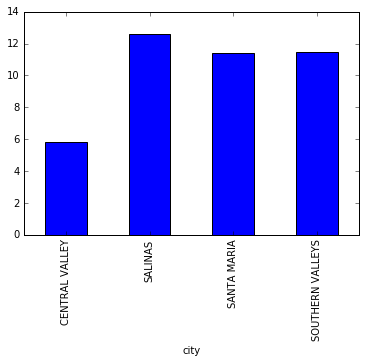

In [62]:
# Q: what terminal has the highest pricing?
#A: Salinas
b.groupby('city').avg_price.mean().plot('bar')

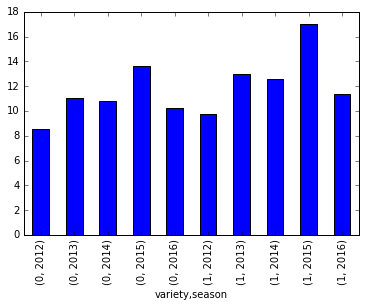

In [63]:
#Q: What is the price difference between types over seasons
#A: What the hell happened in 2015?! Actually this is a good illustration of why we're looking at this. We waaaay overpaid for broccoli last year because of a pricing plus model
b.groupby(['variety', 'season']).avg_price.mean().plot('bar')

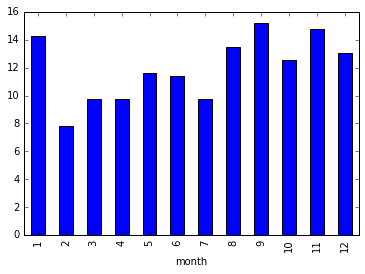

In [64]:
#Q: What are the price fluctuations over the year?
#A: Peak in early fall through winter
b.groupby('month').avg_price.mean().plot('bar')

In [65]:
#time to do some predicting
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#Decision Tree...go!

In [67]:
b.avg_price.mean()

11.8025109170307

In [109]:
b.shape

(8244, 30)

In [68]:
b['prediction'] = b.avg_price.mean()

In [111]:
b['avg_price'].value_counts().head(5)

11.8    225
8.0      99
8.5      98
9.5      89
9.0      89
Name: avg_price, dtype: int64

In [ ]:
#null accuracy - 225/8244 (if you just guessed the most common answer everytime) = 2.7%

In [70]:
b.head(5)

,commodity,city,type,package,variety,sub_variety,grade,date,low_price,high_price,...,avg_price,avg_mostly_price,demand_bunch,demand_cc,demand_general,market_tone_bunch,market_tone_cc,market_tone_general,weather,prediction
0,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/2/16,4.45,7.55,...,6.000,5.750,3.15,3.56,1.0,1.62,1.64,1.7,2.0,11.802511
1,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/3/16,5.45,7.55,...,6.500,5.975,3.15,3.56,1.0,1.62,1.64,2.0,2.0,11.802511
2,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/4/16,5.00,7.55,...,6.275,5.950,3.15,3.56,1.0,1.62,1.64,2.0,2.0,11.802511
3,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/7/16,4.65,8.55,...,6.600,5.950,3.15,3.56,1.0,1.62,1.00,0.0,0.0,11.802511
4,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/8/16,4.65,8.55,...,6.600,6.050,3.15,3.56,1.0,1.62,1.64,2.0,0.0,11.802511


In [71]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(b.avg_price, b.prediction))

5.0282720864288768

In [72]:
features = ['package', 'variety', 'season', 'month', 'weather', 'demand_general', 'market_tone_general']
x = b[features]
y = b.avg_price

In [73]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [74]:
#range of the possible depths
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth)
    MSE_scores = cross_val_score(treereg, x, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

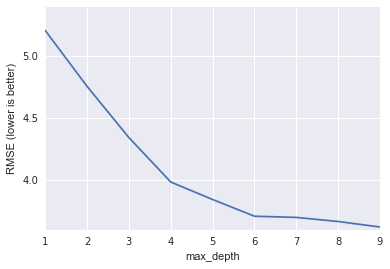

In [75]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [76]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [77]:
#cross val to look at RMSE
scores = cross_val_score(treereg, x, y, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4.6926632783296709

In [78]:
pd.DataFrame({'feature':features, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
2,season,0.474276
3,month,0.350854
5,demand_general,0.109849
1,variety,0.065021
0,package,0.000000
4,weather,0.000000
6,market_tone_general,0.000000


In [79]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_b.dot', feature_names=features)

In [80]:
#linear regression...GO!

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [82]:
b.head(5)

,commodity,city,type,package,variety,sub_variety,grade,date,low_price,high_price,...,avg_price,avg_mostly_price,demand_bunch,demand_cc,demand_general,market_tone_bunch,market_tone_cc,market_tone_general,weather,prediction
0,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/2/16,4.45,7.55,...,6.000,5.750,3.15,3.56,1.0,1.62,1.64,1.7,2.0,11.802511
1,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/3/16,5.45,7.55,...,6.500,5.975,3.15,3.56,1.0,1.62,1.64,2.0,2.0,11.802511
2,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/4/16,5.00,7.55,...,6.275,5.950,3.15,3.56,1.0,1.62,1.64,2.0,2.0,11.802511
3,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/7/16,4.65,8.55,...,6.600,5.950,3.15,3.56,1.0,1.62,1.00,0.0,0.0,11.802511
4,BROCCOLI,SALINAS,NaN,1.0,0,NaN,NaN,3/8/16,4.65,8.55,...,6.600,6.050,3.15,3.56,1.0,1.62,1.64,2.0,0.0,11.802511


In [112]:
feature_cols = ['variety', 'season', 'month', 'demand_general', 'city_int']
x = b[feature_cols]
y = b.avg_price

In [113]:
linreg = LinearRegression()

In [114]:
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
# print the coefficients
print linreg.intercept_
print linreg.coef_

-2378.51181512
[ 1.85064758  1.18422778  0.35622725  0.97526616 -0.0522782 ]


In [116]:
zip(feature_cols, linreg.coef_)

[('variety', 1.8506475832674987),
 ('season', 1.1842277776822405),
 ('month', 0.35622725390044341),
 ('demand_general', 0.97526615708834574),
 ('city_int', -0.052278199185665862)]

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [118]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
linreg.predict(x_test).mean()

11.789726237675097

In [120]:
# try predicting for a new season (crown cut, 9/2016, high demand, Salinas)
sept_2016 = [1, 2016, 9, 5, 1]
linreg.predict(sept_2016)

/Users/anastasia.petrie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 18.79927678])

In [121]:
#i think i needed to bucket, the model having a hard time predicting exact price
linreg.score(x_test,y_test)

0.26510511222237299

In [122]:
#train test split rmse
def train_test_rmse(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [123]:
feature_cols = ['season', 'month', 'demand_general', 'variety']
x = b[feature_cols]
train_test_rmse(x, y)

4.129541547899616

In [124]:
#so all of our predictig has been for all the broccoli, what happens if we look at specificaly just the crown cut (industry standard)?
crown_cut = b[b.variety==1]

In [125]:
crown_cut.head(5)

,commodity,city,type,package,variety,sub_variety,grade,date,low_price,high_price,...,avg_price,avg_mostly_price,demand_bunch,demand_cc,demand_general,market_tone_bunch,market_tone_cc,market_tone_general,weather,prediction
149,BROCCOLI,SALINAS,NaN,2.0,1,NaN,NaN,3/4/16,6.45,7.65,...,7.050,11.49,3.15,3.56,1.0,1.62,1.64,2.0,2.0,11.802511
150,BROCCOLI,SALINAS,NaN,2.0,1,NaN,NaN,3/7/16,5.65,7.65,...,6.650,11.49,3.15,3.56,1.0,1.62,1.00,0.0,0.0,11.802511
151,BROCCOLI,SALINAS,NaN,2.0,1,NaN,NaN,3/8/16,5.65,7.65,...,6.650,11.49,3.15,3.56,1.0,1.62,1.64,2.0,0.0,11.802511
152,BROCCOLI,SALINAS,NaN,2.0,1,NaN,NaN,3/9/16,NaN,NaN,...,11.800,11.49,3.15,3.56,1.0,1.62,1.64,2.0,2.0,11.802511
153,BROCCOLI,SALINAS,NaN,2.0,1,NaN,NaN,3/10/16,7.00,10.45,...,8.725,7.75,3.15,3.56,1.0,1.62,1.64,2.0,2.0,11.802511


In [126]:
feature_cols = ['package', 'variety', 'season', 'month', 'weather', 'demand_cc', 'market_tone_cc', 'city_int']
x = crown_cut[feature_cols]
y = crown_cut.avg_price

In [127]:
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [129]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
def train_test_rmse(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [131]:
#exactly the same, actually a little worse...
x = crown_cut[feature_cols]
train_test_rmse(x, y)

4.8347995478005226

In [132]:
#making visualizations for the presentation 

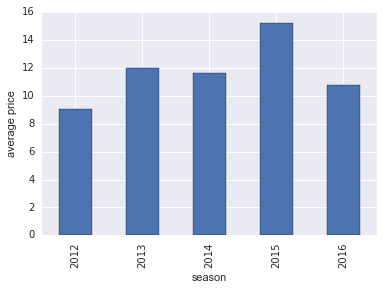

In [133]:
b.groupby('season').avg_price.mean().plot('bar')
plt.xlabel('season')
plt.ylabel('average price')

In [134]:
#2015 was a particularly volitile year, breaking it out for graphs
b_2015 = b[b.season==2015]

In [135]:
b_2015.shape

(1789, 30)

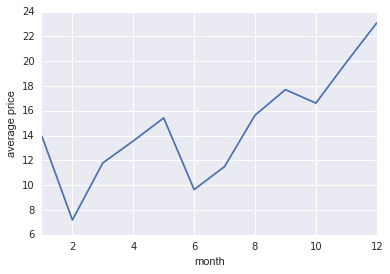

In [136]:
b_2015.groupby('month').avg_price.mean().plot('line')
plt.xlabel('month')
plt.ylabel('average price')

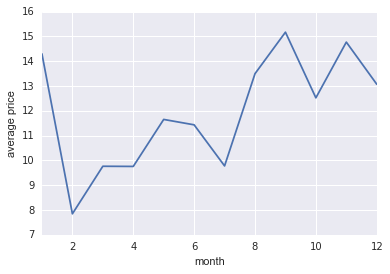

In [137]:
b.groupby('month').avg_price.mean().plot('line')
plt.xlabel('month')
plt.ylabel('average price')

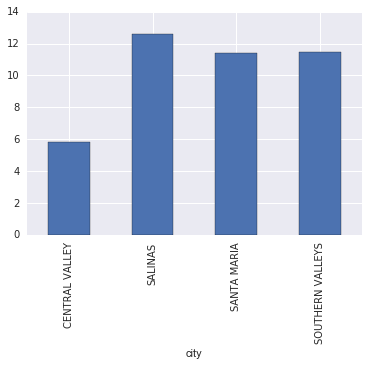

In [138]:
b.groupby(['city']).avg_price.mean().plot('bar')

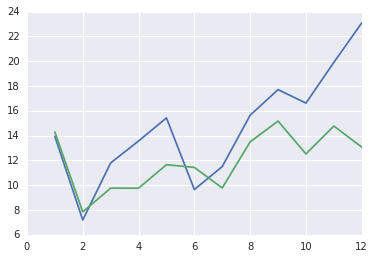

In [139]:
data1 = b_2015.groupby('month').avg_price.mean()
data2 = b.groupby('month').avg_price.mean()

def plotter():
    plt.plot(data1)
    plt.plot(data2)
    plt.show()
    
plotter()

In [141]:
#try a linear regression with price buckets 
#null accuracy = 52%
pd.cut(b.avg_price, 5, labels=[0,1,2,3,4]).value_counts()

0    4307
1    2934
2     773
3     203
4      27
dtype: int64

In [142]:
b['price_bucket'] = pd.cut(b.avg_price, 5, labels=[0,1,2,3,4])

In [143]:
b['price_bucket'].unique()

[0, 1, 2, 3, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [144]:
b['avg_price'].max()

38.299999999999997

In [145]:
b['avg_price'].min()

4.0

In [146]:
'''
0 = 4-10.85
1 = 10.86-17.7
2 = 17.7-24.55
3 = 24.56 - 31.40
4 = 31.4 - 38.29
'''

'\n0 = 4-10.85\n1 = 10.86-17.7\n2 = 17.7-24.55\n3 = 24.56 - 31.40\n4 = 31.4 - 38.29\n'

In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [155]:
feature_cols = ['variety', 'season', 'month', 'demand_general', 'city_int', 'market_tone_general']
x = b[feature_cols]
y = b.price_bucket

In [156]:
logreg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [158]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
logreg.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1])

In [160]:
logreg.score(x_test,y_test)

0.61960213488597771

In [162]:
sept_2016 = [1, 2016, 9, 5, 1, 2]
logreg.predict(sept_2016)

/Users/anastasia.petrie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])